### Stock Price Variance 
a.k.a buy/sell v0.0.1

In [69]:
#==== import needed libs ====#
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import requests
import lxml
import time
import csv
import io
### Keras ====================#
from keras.layers import Dense
from keras.models import Sequential
### SKLearn ==================#
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, KFold, cross_validate, LeaveOneOut

In [2]:
def getStockHist(tic, date_str):
    tickerData = yf.Ticker(tic)
    df_TIC = tickerData.history(period=date_str)
    sp_close = df_TIC[['Close', 'Volume']].copy(deep=True)
    sp_open = df_TIC[['Open', 'Volume']].copy(deep=True)
    sp_open.index = sp_open.index + pd.DateOffset(hours=9.5)
    sp_close.index = sp_close.index + pd.DateOffset(hours=16)
    sp_clrn = sp_close.rename(columns={"Close": "Price"}, errors="raise") 
    sp_oprn = sp_open.rename(columns={"Open": "Price"}, errors="raise") 
    mergedt = pd.concat([sp_clrn, sp_oprn])
    df_TIC_m = mergedt.sort_index()
    return df_TIC_m

In [3]:
#df = pd.read_csv('mkt_data.csv')
df2 = pd.read_csv('mkt_data2.csv')
#df2 = df.copy(deep=True)
#df2.drop(['Adj Close'], axis=1, inplace = True) # drop unused column
#df2.drop(['High'], axis=1, inplace = True) # drop unused column
#df2.drop(['Low'], axis=1, inplace = True) # drop unused column
#df2.to_csv('mkt_data2.csv')

In [11]:
df2.head()

,Date,Ticker,Close,Open,Volume
0,1999-01-04 00:00:00,AA,44.143108,44.671768,1258500.0
1,1999-01-04 00:00:00,AAIC,136.250000,127.500000,5000.0
2,1999-01-04 00:00:00,AAME,4.250000,4.625000,2900.0
3,1999-01-04 00:00:00,AAON,0.866941,0.866941,168900.0
4,1999-01-04 00:00:00,AAPL,0.368304,0.376116,952884800.0


In [12]:
tics = df2['Ticker'].unique()

In [13]:
stk_dict = {}
for tic in tics:
    tdf = df2.loc[df2['Ticker'] == tic]
    stk_dict[tic] = tdf

In [14]:
for s in stk_dict:
    filename = "stock_dfs/{}.csv".format(s)
    stk_dict[s].to_csv(filename)
    print(filename)

stock_dfs/AA.csv
stock_dfs/AAIC.csv
stock_dfs/AAME.csv
stock_dfs/AAON.csv
stock_dfs/AAPL.csv
stock_dfs/AB.csv
stock_dfs/ABC.csv
stock_dfs/ABCB.csv
stock_dfs/ABEO.csv
stock_dfs/ABEV.csv
stock_dfs/ABIO.csv
stock_dfs/ABM.csv
stock_dfs/ABMD.csv
stock_dfs/ABT.csv
stock_dfs/ACGL.csv
stock_dfs/ACHC.csv
stock_dfs/ACHV.csv
stock_dfs/ACIW.csv
stock_dfs/ACNB.csv
stock_dfs/ADBE.csv
stock_dfs/ADC.csv
stock_dfs/ADI.csv
stock_dfs/ADM.csv
stock_dfs/ADMP.csv
stock_dfs/ADP.csv
stock_dfs/ADSK.csv
stock_dfs/ADTN.csv
stock_dfs/ADX.csv
stock_dfs/AEE.csv
stock_dfs/AEG.csv
stock_dfs/AEGN.csv
stock_dfs/AEHR.csv
stock_dfs/AEIS.csv
stock_dfs/AEM.csv
stock_dfs/AEO.csv
stock_dfs/AEP.csv
stock_dfs/AES.csv
stock_dfs/AEY.csv
stock_dfs/AFG.csv
stock_dfs/AFL.csv
stock_dfs/AGCO.csv
stock_dfs/AGM.csv
stock_dfs/AGX.csv
stock_dfs/AGYS.csv
stock_dfs/AHPI.csv
stock_dfs/AIG.csv
stock_dfs/AIKI.csv
stock_dfs/AIN.csv
stock_dfs/AIR.csv
stock_dfs/AIRT.csv
stock_dfs/AIT.csv
stock_dfs/AIV.csv
stock_dfs/AJG.csv
stock_dfs/AJRD.csv
sto

In [ ]:
#stk_dict = {}
fldr = "stock_dfs"
for filename in os.listdir(fldr):
    if filename.endswith(".csv"): 
        s = os.path.join(fldr, filename)
        f = filename.split('.')[0]
        stk3_dict[f] = pd.read_csv(s)
        continue
    else:
        continue

In [23]:
#tdf = df2.loc[df2['Ticker'] == tic]
#.loc[:, ('one', 'second')]
stk_dict["AAPL"]['Datetime'] = pd.to_datetime(stk_dict["AAPL"]['Date'])
stk_dict["AAPL"] = stk_dict["AAPL"].set_index('Datetime')
stk_dict["AAPL"].drop(['Date'], axis=1, inplace=True)
stk_dict["AAPL"].tail()

<ipython-input-23-5e28d9364b13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_dict["AAPL"]['Datetime'] = pd.to_datetime(stk_dict["AAPL"]['Date'])


,Ticker,Close,Open,Volume
Datetime,,,,
2021-06-04,AAPL,125.889999,124.070000,75169300.0
2021-06-07,AAPL,125.900002,126.169998,71057600.0
2021-06-08,AAPL,126.739998,126.599998,74403800.0
2021-06-09,AAPL,127.129997,127.209999,56877900.0
2021-06-10,AAPL,126.110001,127.019997,71186400.0


In [24]:
for s in stk_dict:
    try:
        stk_dict[s]['Datetime'] = pd.to_datetime(stk_dict[s]['Date'])
        stk_dict[s] = stk_dict[s].set_index('Datetime')
        stk_dict[s].drop(['Date'], axis=1, inplace=True)
    except Exception:
        pass  # or you could use 'continue'


<ipython-input-24-62bf10d44379>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stk_dict[s]['Datetime'] = pd.to_datetime(stk_dict[s]['Date'])


In [34]:
dotcom_hiy = {}
dotcom_low = {}
housng_hiy = {}
housng_low = {}

for s in stk_dict:
    dotcom_hiy[s] = stk_dict[s].loc['2000-2-1':'2000-2-29']['Close'].mean()
    dotcom_low[s] = stk_dict[s].loc['2002-9-1':'2002-9-30']['Close'].mean()
    housng_hiy[s] = stk_dict[s].loc['2007-10-1':'2007-10-31']['Close'].mean()
    housng_low[s] = stk_dict[s].loc['2009-2-1':'2009-2-28']['Close'].mean()
    #between_time(time(1),time(22,59,59))['lng'].mean()

In [36]:
dotcom_hiy_2002 = {}
housng_hiy_2009 = {}
for s in stk_dict:
    dotcom_hiy_2002[s] = (dotcom_hiy[s] * 1.045)
    housng_hiy_2009[s] = (dotcom_hiy[s] * 1.035)

In [47]:
winr = pd.DataFrame(columns = ['Ticker', 'DotCOM %', 'Housing %'])
winr

,Ticker,DotCOM %,Housing %


In [50]:
winr.describe()

,DotCOM %,Housing %
count,642.000000,642.000000
mean,178.998822,49.138858
std,95.528507,24.483130
min,100.084346,2.765053
25%,126.168990,29.620441
50%,152.311804,46.921677
75%,194.533570,67.972849
max,1038.596493,99.657024


In [58]:
winr["Combined %"] = ((winr["DotCOM %"] + winr["Housing %"]) / 2)

In [63]:
winr["Difference"] = ((winr["DotCOM %"] - winr["Housing %"]).abs() / winr["Combined %"])

In [64]:
#winr.head()
winr2 = winr.sort_values(by='Difference', ascending=True)

In [65]:
winr2.head()

,Ticker,DotCOM %,Housing %,Combined %,Difference
158,EFX,100.648382,96.667837,98.658110,0.040347
380,NXR,102.364792,96.837642,99.601217,0.055493
428,QCRH,104.772677,97.574356,101.173517,0.071148
93,CCNE,104.840821,97.524957,101.182889,0.072303
317,MATX,106.036533,98.088672,102.062602,0.077872


In [66]:
winr2.to_csv("best.csv")

In [70]:
#winr2
tt = yf.Ticker("KRC")
tt.info()

ImportError: lxml not found, please install it

In [42]:
x = 0
for s in stk_dict:
    x += 1
print(x)

6953


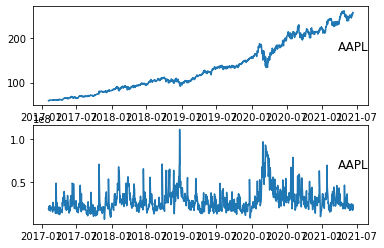

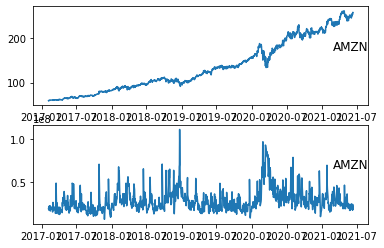

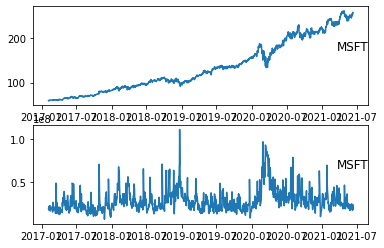

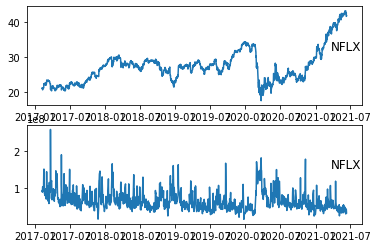

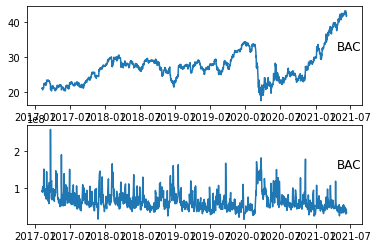

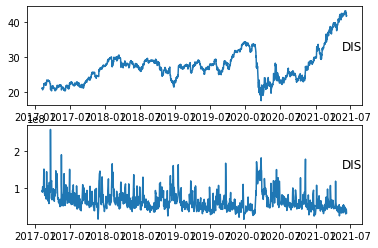

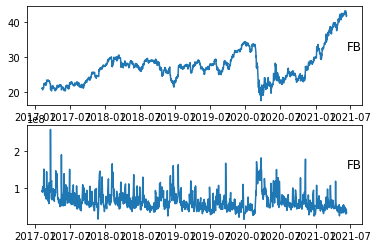

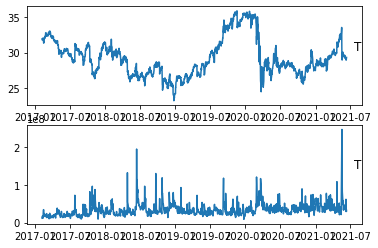

In [51]:
# specify columns to plot
#plt.plot(mergeds['Price'])
#plt.show()
tickers = [df_AAPL, df_AMZN, df_MSFT, df_NFLX, df_BAC, df_DIS, df_FB, df_T]
strs = ['AAPL', 'AMZN', 'MSFT', 'NFLX', 'BAC', 'DIS', 'FB', 'T']
groups = [0, 1]
# plot each column
pyplot.figure()
x = 0
for tic in tickers:
    i = 1
    vals = tic.values
    for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(tic.index, vals[:, group]) # vals[:
        pyplot.title(strs[x], y=0.5, loc='right')
        i += 1
    x += 1
    pyplot.show()

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [9]:
#==== set date ranges =======#
start = datetime.date.today() - relativedelta(months=+1)
end = datetime.date.today()
print(start)

2021-05-13


In [11]:
#==== import stocks as df =======#
###\\\\\\ NASDAQ \\\\\\#
## Market Category	Values:
# Q = NASDAQ Global Select MarketSM
# G = NASDAQ Global MarketSM
# S = NASDAQ Capital Market
## Financial Status: Indicates an issuer failed to submit regulatory filings, failed to meet NASDAQ's standards, or has filed for bankruptcy. Values include:
# D = Deficient: Issuer Failed to Meet NASDAQ Continued Listing Requirements
# E = Delinquent: Issuer Missed Regulatory Filing Deadline
# Q = Bankrupt: Issuer Has Filed for Bankruptcy
# N = Normal (Default): Issuer Is NOT Deficient, Delinquent, or Bankrupt.
# G = Deficient and Bankrupt
# H = Deficient and Delinquent
# J = Delinquent and Bankrupt
# K = Deficient, Delinquent, and Bankrupt
## Round Lot: Indicates the number of shares that make up a round lot for the given security.
###\\\\\\ OTHERS \\\\\\#
## Exchange:
# A = NYSE MKT
# N = New York Stock Exchange (NYSE)
# P = NYSE ARCA
# Z = BATS Global Markets (BATS)
# V = Investors' Exchange, LLC (IEXG)
## ETF: Y = Yes, security is an ETF, N = No, security is not an ETF
#ndq = pd.read_csv('ndq.csv')
#oth = pd.read_csv('oth.csv')
#etf = com.loc[com['ETF'] == 'Y']
#etf = etf.loc[etf['Test Issue'] == 'N']
#etf = etf.loc[etf['Financial Status'] == 'N']
#etf.head()
#df = pd.read_csv('sample.csv')
#df.head()

In [ ]:
# Split off the target column, create X/y, and split the training set for model use.
X = dizy_train.drop('Disease', axis=1)
y = dizy_train['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
## Deep Learning Model Architecture
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(18, ))) # 114 parameters: (18+1)*6=114
model.add(Dense(6, activation='relu')) # (6+1)*6 = 42 parameters
model.add(Dense(1, activation='sigmoid')) # 7 parameters
model.output_shape
model.summary()

In [ ]:
model.get_config()
model.get_weights()

In [ ]:
## Model Specification and Training
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=8, batch_size=5) # Consider using validation set

In [53]:
nd_tics = pd.read_csv('ndq.csv')
ot_tics = pd.read_csv('oth.csv')
ny_tics = ot_tics.loc[ot_tics['Exchange'] == 'N']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Symbol            4679 non-null   object
 1   Security Name     4679 non-null   object
 2   Market Category   4679 non-null   object
 3   Test Issue        4679 non-null   object
 4   Financial Status  4679 non-null   object
 5   Round Lot Size    4679 non-null   int64 
 6   ETF               4670 non-null   object
 7   NextShares        4679 non-null   object
dtypes: int64(1), object(7)
memory usage: 292.6+ KB


In [89]:
# Python program to illustrate union
# Without repetition 
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

nd_lst = nd_tics['Symbol'].tolist()
ny_lst = ny_tics['ACT Symbol'].tolist()

mkt_lst = Union(nd_lst, ny_lst)
#mdf1 = yf.download(mkt_lst, group_by='Ticker', start="1999-01-01", end="2021-06-11")
#mdf2 = mdf1.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
#mdf2.head()